<a href="https://colab.research.google.com/github/daffafiartra22/NVIDIA-Stock-Price-Prediction-and-Analysis-using-LSTM-Machine-Learning-Model/blob/main/NVIDIA_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NVIDIA STOCK PRICE PREDICTION

---



### Introduction to Nvidia Stock Price Prediction and Analysis

Stock price movements are notoriously complex, influenced by a variety of unpredictable market forces. While precise predictions of future prices are often unattainable, understanding price patterns and trends can provide valuable insights for informed decision-making. This project focuses on analyzing patterns in Nvidia's stock price using machine learning, specifically Long Short-Term Memory (LSTM) neural networks, a specialized type of recurrent neural network (RNN) designed for capturing sequential data dependencies over time.

### Objectives
The primary goal of this analysis is not to predict exact future prices but to identify and understand patterns in Nvidia’s stock movements. By leveraging the capabilities of LSTM models, the analysis aims to:

1. Illustrate how machine learning, particularly LSTM, can analyze sequential financial data effectively.
2. Provide insights into price trends and potential patterns that may inform investment strategies.
3. Demonstrate the importance of hyperparameter tuning in enhancing model performance.

### Real-World Application
A practical example of applying this analysis could be in identifying historical trends that signal periods of heightened volatility or stability in Nvidia’s stock prices. Such insights can guide traders or analysts in making decisions about optimal times to enter or exit positions. Additionally, this approach can serve as a foundational tool for developing more advanced trading algorithms.

### Why LSTM?
LSTMs are particularly suited for this task due to their ability to retain long-term dependencies in sequential data, which is critical for financial time series analysis. By capturing patterns across extended time frames, LSTMs provide a robust framework for understanding how past price movements influence future trends.


This project highlights the intersection of financial analysis and machine learning, emphasizing pattern recognition over precise predictions. It showcases the implementation of LSTM models and the importance of hyperparameter tuning in achieving meaningful results, serving as a practical guide for similar endeavors in stock price analysis.



# Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
data = pd.read_csv('NVDA.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

### What's inside the data ?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 526 entries, 2019-05-31 to 2021-06-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          526 non-null    float64
 1   High          526 non-null    float64
 2   Low           526 non-null    float64
 3   Close         526 non-null    float64
 4   Volume        526 non-null    int64  
 5   Dividends     526 non-null    float64
 6   Stock Splits  526 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 32.9 KB


In [ ]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-05-31,34.149841,34.824672,33.714066,33.731499,38972000,0.0,0
2019-06-03,33.843554,34.232016,33.019317,33.313152,47864400,0.0,0
2019-06-04,33.955614,35.661365,33.733991,35.609070,64183600,0.0,0
2019-06-05,36.348634,36.403417,34.817197,35.180756,51161600,0.0,0
2019-06-06,35.223087,36.049817,35.198188,35.803291,40814000,0.0,0


In [ ]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,526.000000,526.000000,526.000000,526.000000,5.260000e+02,526.000000,526.0
mean,95.100091,96.687474,93.474592,95.183669,4.193624e+07,0.000608,0.0
std,43.129410,43.754978,42.430704,43.173183,2.017428e+07,0.004900,0.0
min,33.843554,34.232016,33.019317,33.313152,9.788400e+06,0.000000,0.0
25%,52.712066,54.047719,52.076339,52.924717,2.770540e+07,0.000000,0.0
50%,91.544188,92.531798,88.819600,91.536709,3.630120e+07,0.000000,0.0
75%,133.544817,135.015029,130.771128,133.377304,5.174130e+07,0.000000,0.0
max,199.992493,201.625000,198.637497,200.267502,1.463684e+08,0.040000,0.0


### Check Missing Values

<Axes: >

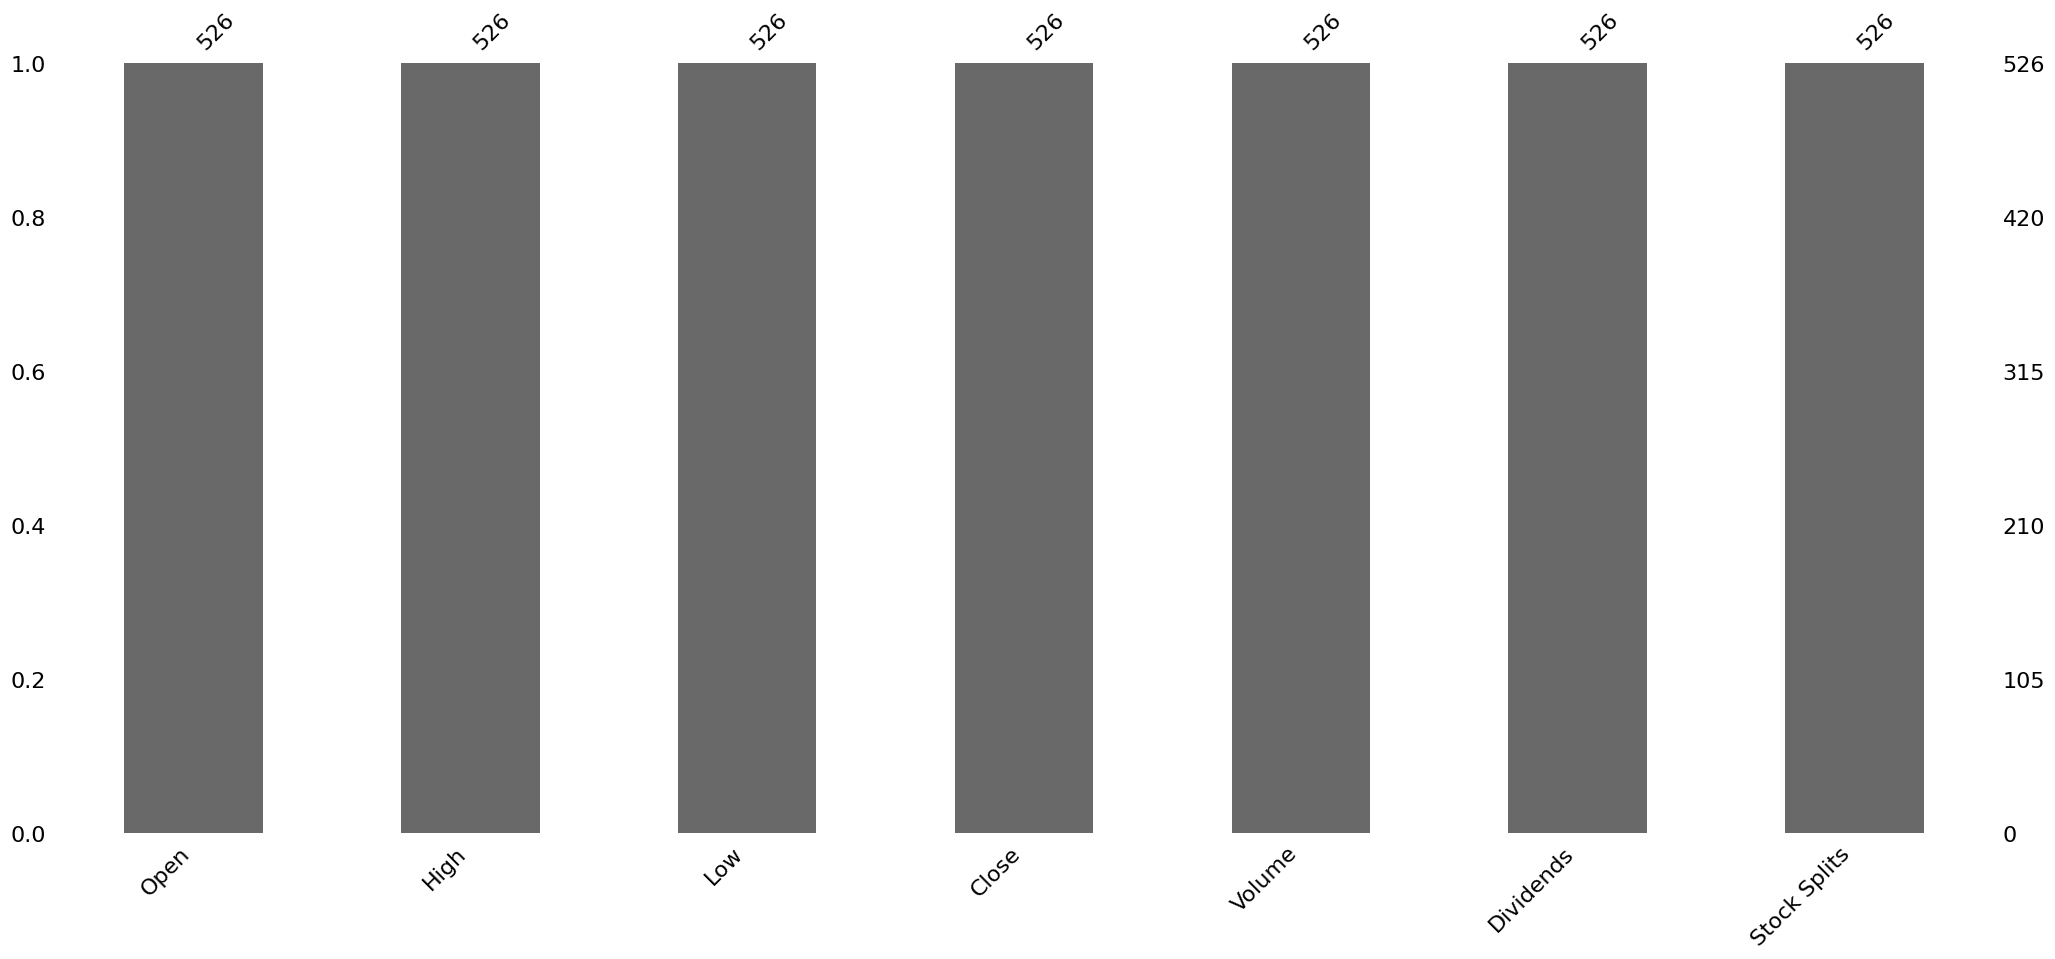

In [ ]:
msno.bar(data)

### Data Visualization

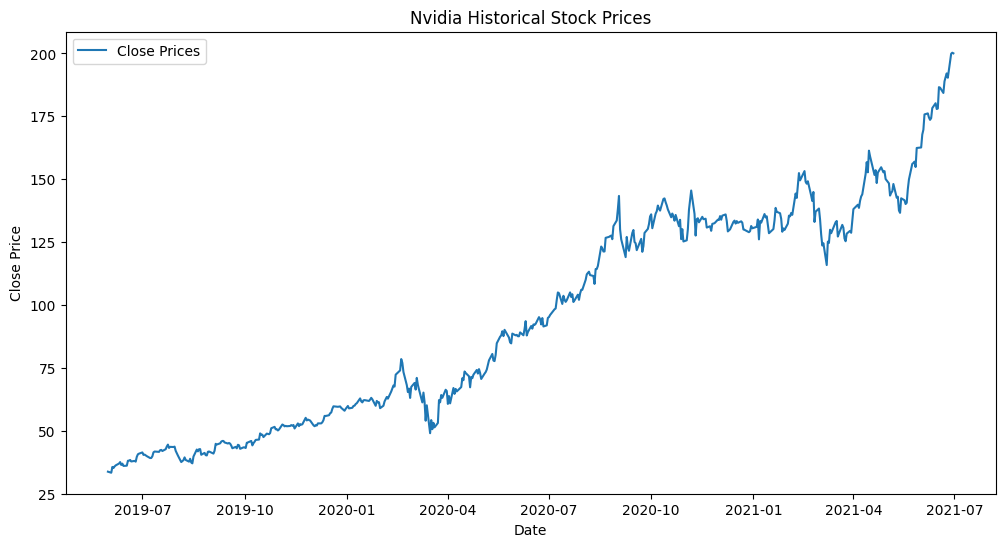

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Prices')
plt.title('Nvidia Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

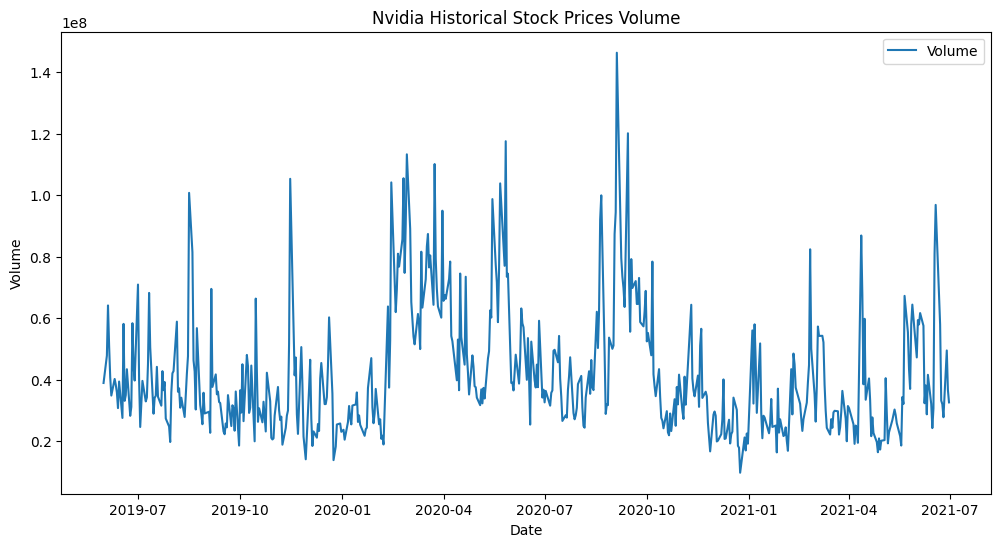

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Volume'], label='Volume')
plt.title('Nvidia Historical Stock Prices Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

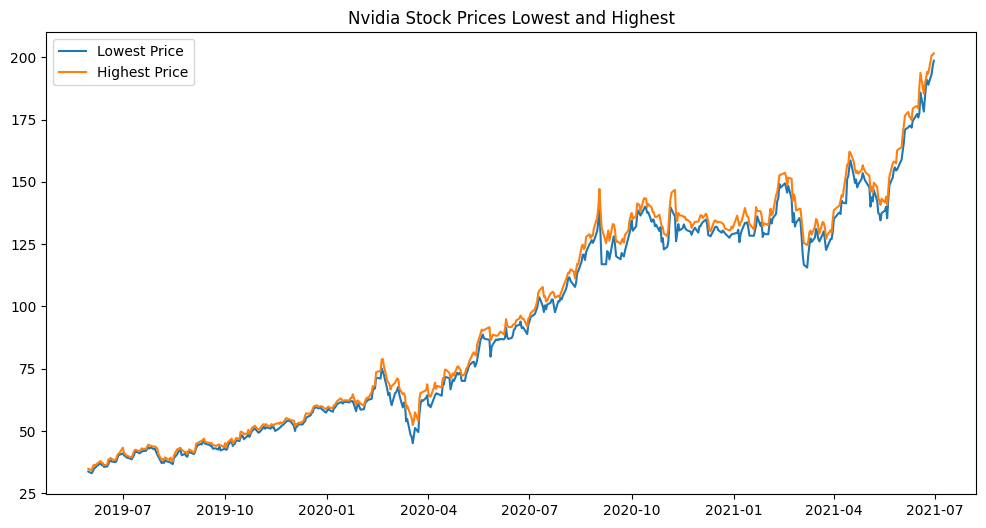

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Low'], label='Lowest Price')
plt.plot(data['High'], label='Highest Price')
plt.title('Nvidia Stock Prices Lowest and Highest')
plt.legend()
plt.show()

# Feature Engineering

### New Features

Why Create New Features like SMA and Volatility?
* Simple Moving Average (SMA):
SMA is a widely used indicator in stock market analysis. It smooths out price data over a specific time period, making trends easier to identify.
SMA_20 (20-day average) captures short-term trends, while SMA_50 (50-day average) captures medium-term trends. These are commonly used periods in financial analysis.
For Nvidia stock analysis, adding these features helps identify whether the price is in an uptrend, downtrend, or ranging market. It also reflects momentum, which could be relevant for analyzing patterns in price movement.

* Volatility :
Volatility measures the range of price fluctuations within a period. It is calculated here as the difference between the High and Low prices for the day.
Nvidia's stock, like most tech stocks, is known for being relatively volatile. Including volatility as a feature provides insight into price variability, which might help the model understand when prices are stable or fluctuating wildly.
These features are suitable for stock price analysis because they incorporate market behavior beyond the basic price points (Close, Open, High, Low). They add context to the data and make the model more informed about historical trends and market dynamics.

In [ ]:
# Building new features (Simple Moving Average and Volatility)
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['High'] - data['Low']
data = data.dropna()  # Hapus nilai NaN akibat rolling window

# Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close', 'Open', 'High', 'Low', 'SMA_20', 'SMA_50', 'Volatility']])

### New Features Visualization

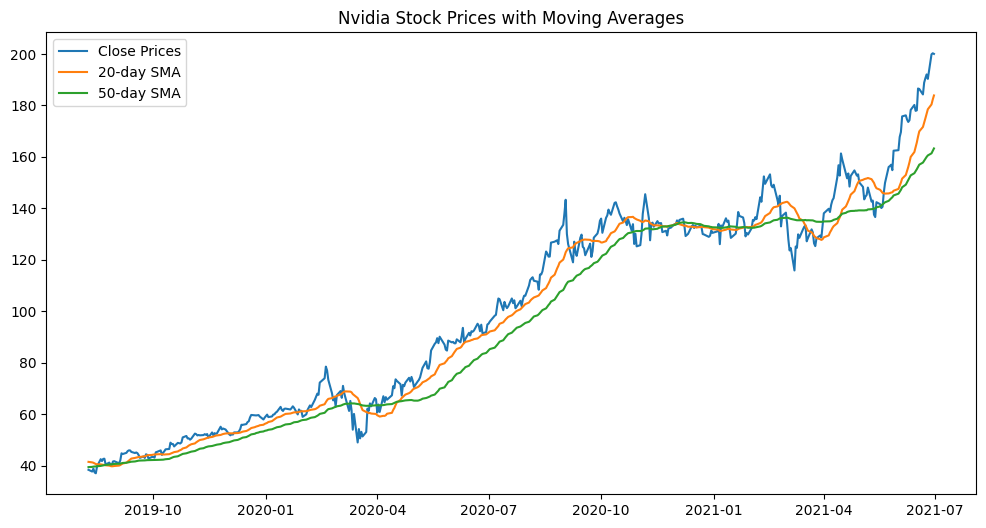

In [ ]:
# Simple Moving Average
plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Close Prices')
plt.plot(data['SMA_20'], label='20-day SMA')
plt.plot(data['SMA_50'], label='50-day SMA')
plt.title('Nvidia Stock Prices with Moving Averages')
plt.legend()
plt.show()

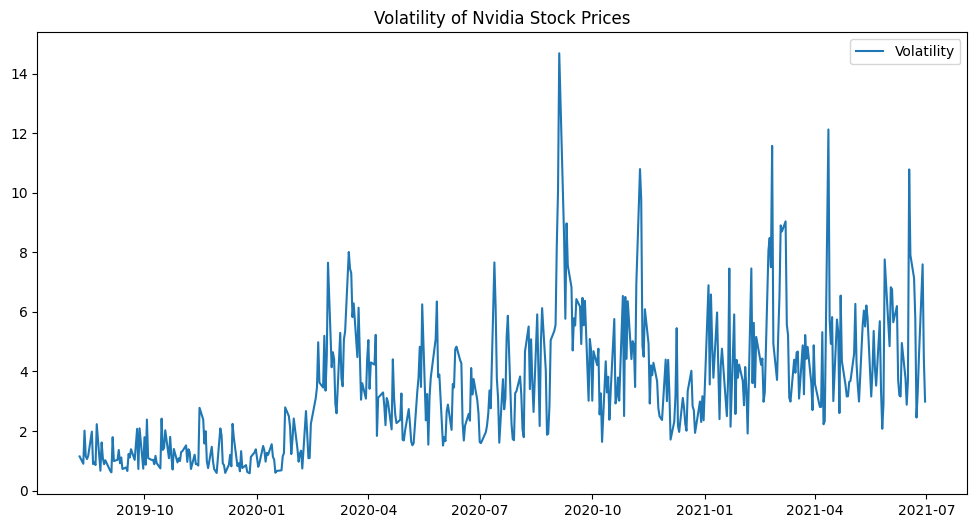

In [ ]:
# Volatility
plt.figure(figsize=(12, 6))
plt.plot(data['Volatility'], label='Volatility')
plt.title('Volatility of Nvidia Stock Prices')
plt.legend()
plt.show()

In [ ]:
# Normalize all features
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Close', 'Open', 'High', 'Low', 'SMA_20', 'SMA_50', 'Volatility']])

# Create Timeseries Dataset

In [ ]:
# Making dataset as time series
def create_multivariate_dataset(dataset, time_step=30):
    X, y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:i+time_step, :])  # All features
        y.append(dataset[i+time_step, 0])   # 'Close' as target
    return np.array(X), np.array(y)

X, y = create_multivariate_dataset(scaled_data, time_step=30)

# Reshape data
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])  # Multivariate input

# Data Train, Test and Validaton

In [ ]:
# Splitting data into Train, Test and Validation
train_split = int(0.7 * len(X))  # 70% as training
val_split = int(0.85 * len(X))  # 15% for validation and 15% for testing


X_train, X_val, X_test = X[:train_split], X[train_split:val_split], X[val_split:]
y_train, y_val, y_test = y[:train_split], y[train_split:val_split], y[val_split:]


# LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

def build_multivariate_model(time_step, n_features):
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_step, n_features)))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Parameter model
time_step = 30  # Panjang timesteps
n_features = X_train.shape[2]  # Jumlah fitur multivariate

# Build the model using the parameter
model = build_multivariate_model(time_step, n_features)

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), verbose=1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0452 - val_loss: 0.0019
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0052 - val_loss: 0.0023
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0036 - val_loss: 0.0017
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0028 - val_loss: 0.0023
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0022 - val_loss: 0.0016
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0020 - val_

### LSTM Model result Visualization


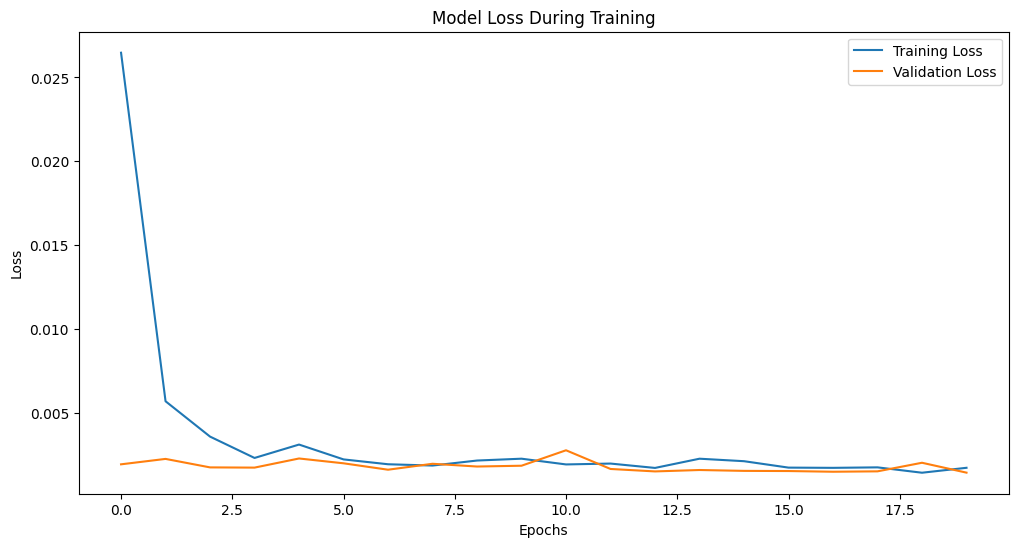

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Model evaluation
 initial_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Initial Loss (Before Tuning): {initial_loss}")

Initial Loss (Before Tuning): 0.00891533400863409


* Graph:
The smooth convergence of training and validation loss demonstrates that the model is learning effectively without overfitting.
* Initial Loss Value:
The test loss (0.0089) shows the model's accuracy on unseen data and provides a baseline performance before any further tuning or optimization.

# Hyperparameter Tuning

**What Is Hyperparameter Tuning ?**

Hyperparameter tuning is the process of optimizing the hyperparameters of a machine learning or deep learning model to achieve the best performance. Hyperparameters are configuration settings that are not learned from data but are set before training begins. Unlike model parameters (such as weights and biases in a neural network), hyperparameters control aspects like learning rate, number of layers, number of neurons, dropout rate, and batch size.
Since different hyperparameter values can significantly affect a model's performance, hyperparameter tuning is essential for finding the best combination that minimizes loss and improves accuracy on unseen data.

**Why is Hyperparameter Tuning Important for LSTM?**

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) designed to capture sequential dependencies in time-series data, such as stock prices. However, LSTMs have many hyperparameters that can impact their ability to learn patterns effectively. Proper hyperparameter tuning helps to:
* Improve Predictive Accuracy : The right number of LSTM units ensures that the model learns meaningful patterns without overfitting or underfitting.
* Prevent Overfitting : Using dropout layers with an optimal rate prevents the model from memorizing training data instead of generalizing.
* Optimize Computational Efficiency: Finding the right balance between model complexity and training time ensures that the model is both powerful and efficient.
* Enhance Convergence Speed: Tuning optimizer settings like the learning rate helps the model converge faster and avoid getting stuck in local minima.

In [ ]:
!pip install keras-tuner
from keras_tuner import RandomSearch

def build_tunable_model(hp):
    model = Sequential()
    # Correct the input shape to match the number of features
    model.add(LSTM(
        hp.Int('units', min_value=32, max_value=128, step=32),
        return_sequences=True,
        input_shape=(time_step, n_features)))  # n_features should be 7
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(LSTM(hp.Int('units', min_value=32, max_value=128, step=32)))
    model.add(Dropout(hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Tuner Initialization
tuner = RandomSearch(
    build_tunable_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=1,
    directory='hyperparam_tuning',
    project_name='nvidia_stock')

# Run the Tuning
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 20 Complete [00h 00m 18s]
val_loss: 0.0016177261713892221

Best val_loss So Far: 0.0014814449241384864
Total elapsed time: 00h 03m 50s


This section focuses on optimizing the LSTM model for predicting NVIDIA stock prices using Keras Tuner's Random Search. The goal is to find the best set of hyperparameters that minimizes validation loss (mean_squared_error), improving the model’s predictive performance.

The number of LSTM units is tuned within a range of 32 to 128, with increments of 32, allowing the model to adjust its learning capacity. A higher number of units may capture complex patterns better but also increases computational cost and the risk of overfitting. The dropout rate, used for regularization, is tuned between 0.1 and 0.5 in steps of 0.1, helping prevent overfitting by randomly deactivating neurons during training.

The model consists of two LSTM layers, where the first layer is set with return_sequences=True to pass sequential data to the next LSTM layer, allowing the model to learn deeper temporal dependencies. A Dense layer is added at the end to output a single stock price prediction. The Adam optimizer is used for training, leveraging its adaptive learning rate for efficient convergence.

The Random Search tuner explores 20 different hyperparameter configurations, evaluating each setup over 10 epochs. The tuning process optimizes based on validation loss (val_loss), ensuring the model generalizes well to unseen data.

### Best Model ###

In [ ]:
# Best Model
print(f"Best units: {best_hps.get('units')}")
print(f"Best dropout: {best_hps.get('dropout')}")

Best units: 128
Best dropout: 0.1


In [ ]:
# Rebuilding the model using the best hyperparameter
best_model = tuner.hypermodel.build(best_hps)

# Architecture of the best models
best_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 30, 128)             │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,345 (786.50 KB)

 Trainable params: 201,345 (786.50 KB)

 Non-trainable params: 0 (0.00 B)

The best model obtained from hyperparameter tuning using Keras Tuner has the following architecture:

* LSTM Layer 1: 128 units with return_sequences=True, allowing sequential data to be passed to the next LSTM layer.
* Dropout Layer 1: 10% dropout to prevent overfitting.
* LSTM Layer 2: 128 units, capturing deeper patterns in the time-series data.
* Dropout Layer 2: 10% dropout for additional regularization.
* Dense Layer: 1 unit for the final stock price prediction output.

This model has 201,345 trainable parameters, making it complex enough to capture trends in NVIDIA stock prices while remaining computationally efficient. With this optimal configuration, the model is expected to provide more accurate and generalizable predictions for unseen data.

In [ ]:
# Build best model using the best hyperparameter
best_model = tuner.hypermodel.build(best_hps)

# Training best model
history_best = best_model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

# Best Model Evaluation
loss = best_model.evaluate(X_test, y_test)
print(f'Loss of the Best Model: {loss}')

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 259ms/step - loss: 0.0389 - val_loss: 0.0070
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - loss: 0.0041 - val_loss: 0.0038
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - loss: 0.0024 - val_loss: 0.0045
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 0.0013 - val_loss: 0.0021
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - loss: 0.0012 - val_loss: 0.0018
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 0.0010 - val_loss: 0.0023
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - loss: 0.0011 - val_loss: 0.0022
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0010 - val_loss: 0.0018
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - loss: 0.0010 - val_loss: 0.0021
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - loss: 9.4443e-04 - val_loss: 0.0019
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/st

The best LSTM model was built using the optimal hyperparameters obtained from hyperparameter tuning. It was then trained on the training dataset for 20 epochs with validation data used to monitor its performance.

After training, the model was evaluated on the test dataset, resulting in a final loss of 0.0060. Since Mean Squared Error (MSE) is used as the loss function, a lower value indicates better performance. This suggests that the model has successfully learned patterns in the NVIDIA stock price data and can generalize well to unseen data.

### Hyperparameter Tuning result visualization

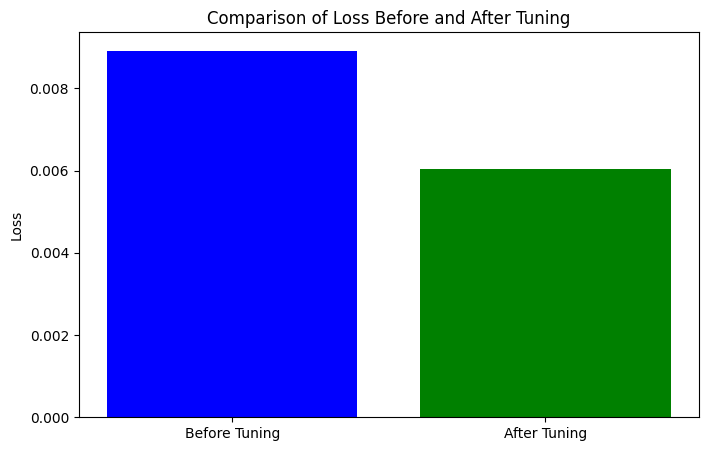

In [ ]:
# Loss values ​​of the initial model and the model after tuning
loss_values = [initial_loss, loss]  # initial_loss: before tuning, loss: after tuning
labels = ['Before Tuning', 'After Tuning']

# Plot
plt.figure(figsize=(8, 5))
plt.bar(labels, loss_values, color=['blue', 'green'])
plt.title('Comparison of Loss Before and After Tuning')
plt.ylabel('Loss')
plt.show()


# Prediction Result

Before visualizing the prediction result, we have to convert the data back to their original scale. The dummy array is used to perform an inverse transformation on the predicted stock prices. Since the dataset was scaled using MinMaxScaler before training, the model’s predictions are in a normalized form. To convert them back to their original scale, a dummy array with the same number of features as the original dataset (7 features) is created.

* The predictions are stored in the first column of the dummy array, while the remaining columns are filled with zeros.
* The inverse transformation is then applied using the same scaler that was used for normalization, converting the predictions back to the original stock price scale.
* A similar process is applied to y_test, ensuring that both actual and predicted prices are in the correct scale for a fair comparison.

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 342ms/step


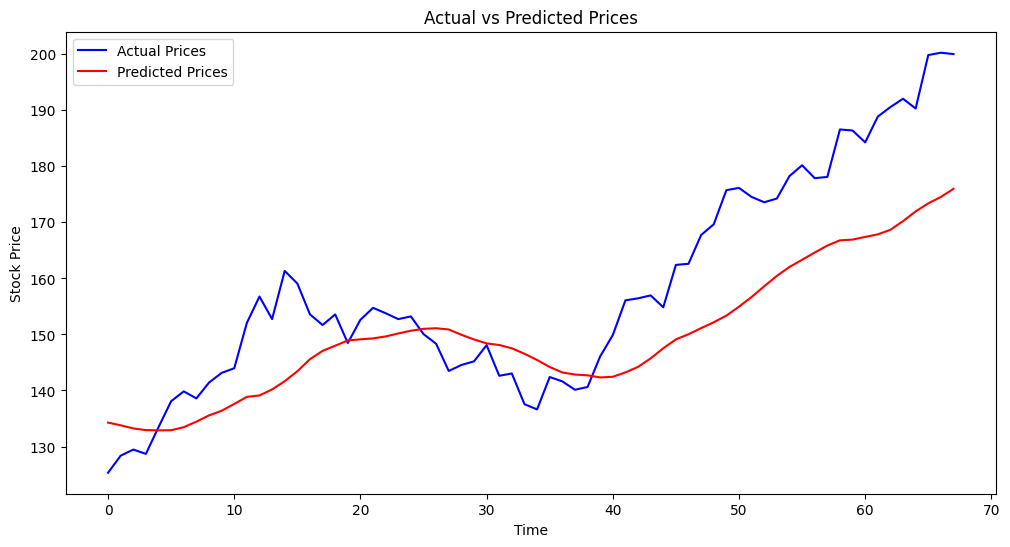

In [ ]:
# Prediction on data testing
predictions = best_model.predict(X_test)

# Dummy array
dummy_data = np.zeros((predictions.shape[0], 7))
dummy_data[:, 0] = predictions.reshape(-1)  # hasil prediksi ditaro di kolom

# Converting data back to original scale
predictions_original = scaler.inverse_transform(dummy_data)[:, 0]  # Extract the 'Close' price after inverse transform
y_test_original = scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((len(y_test),6))], axis=1))[:,0]  #Extract the 'Close' price after inverse transform


# Prediction result
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label='Actual Prices', color='blue')
plt.plot(predictions_original, label='Predicted Prices', color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

The graph compares actual NVIDIA stock prices (blue line) with predicted stock prices (red line) using the test dataset.

* The x-axis represents time, indicating the sequence of stock prices.
* The y-axis represents the stock price values in their original scale.
* The blue line (Actual Prices) shows the real historical stock prices from the test dataset, serving as the ground truth.
* The red line (Predicted Prices) represents the stock price predictions generated by the trained LSTM model.
### Analysis of the Graph ###
* Trend Capture:
The predicted prices follow the general trend of the actual prices, indicating that the model has successfully learned the stock’s movement pattern to some extent.
* Prediction Lag:
The red line is smoother and lags behind the blue line, which is typical for LSTM models due to their dependency on past data for forecasting.
This suggests that while the model captures long-term trends, it struggles with rapid fluctuations and short-term volatility.
* Underestimation of Peaks and Valleys:
The predicted prices tend to underestimate sharp increases and decreases, meaning the model is less responsive to sudden market changes.
This could be due to insufficient training data, a need for additional features, or hyperparameter adjustments to improve sensitivity.
* Generalization Performance:
Since the predictions do not deviate significantly from the actual prices, the model demonstrates a reasonable ability to generalize.
However, further tuning (e.g., more LSTM layers, different dropout rates, or additional technical indicators) could improve accuracy.

**Conclusion**

The LSTM model is effective at capturing the general trend of NVIDIA stock prices but struggles with short-term fluctuations. The graph confirms that the model does not perfectly match the actual prices, highlighting the challenge of predicting stock prices due to their highly dynamic nature. Further improvements can be made by tuning hyperparameters, adding more data, and incorporating additional market indicators.

Mean Absolute Error (MAE): 10.427250533273533
Mean Absolute Percentage Error (MAPE): 6.25%


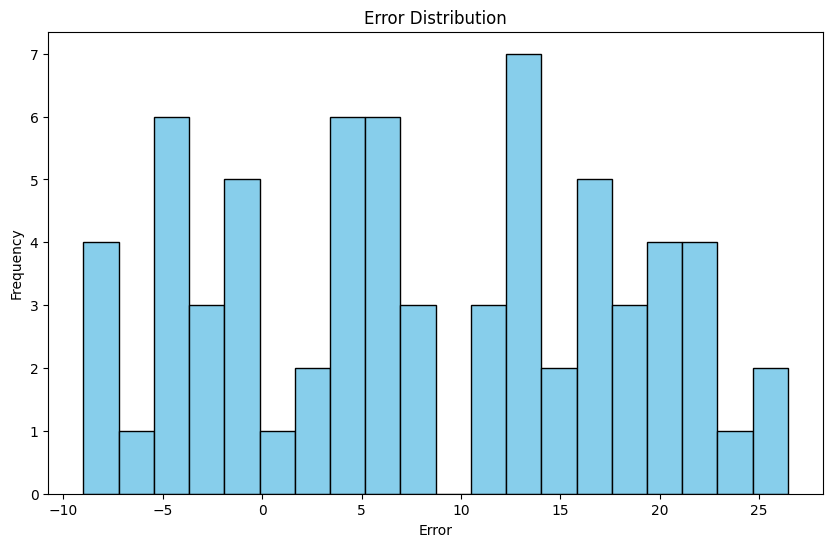

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Menghitung MAE dan MAPE
mae = mean_absolute_error(y_test_original, predictions_original)
mape = mean_absolute_percentage_error(y_test_original, predictions_original)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape * 100:.2f}%")

# Visualisasi distribusi error
error = y_test_original - predictions_original

plt.figure(figsize=(10, 6))
plt.hist(error, bins=20, color='skyblue', edgecolor='black')
plt.title('Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

### Conclusion and Further Improvements ###
1. Model Performance Summary

* The model achieved a Mean Absolute Error (MAE) of 10.43, meaning that, on average, its predictions deviate by 10.43 from the actual NVIDIA stock price.
The Mean Absolute Percentage Error (MAPE) is 6.25%, indicating that the model's predictions are 6.25% off on average compared to actual stock prices.
The error distribution histogram shows that the model sometimes overestimates and sometimes underestimates stock prices, but there are cases where large errors (greater than 20) occur.
This suggests that while the model captures general price trends, it struggles with sharp price fluctuations and extreme movements.

2. Key Observations from the Error Distribution
* Balanced Errors: The presence of both positive and negative errors shows that the model does not have a strong bias in one direction (overestimation or underestimation).
* Wide Error Spread: Some predictions are significantly off, which indicates that the model does not generalize well to all market conditions, particularly during periods of high volatility.
* Potential Outliers: The model may not handle sudden stock price movements effectively, possibly due to lack of external information (such as news sentiment, economic indicators, or market trends).

3. Final Thoughts

* The LSTM model provides moderate accuracy in predicting NVIDIA stock prices, with some success in capturing overall trends.
However, its high error variance suggests it struggles with rapid price movements and market noise.
To improve the model, better feature selection, architectural refinements, and additional external data sources should be incorporated.
While deep learning models like LSTM show promise in stock price forecasting, stock markets remain highly unpredictable, and no model can guarantee precise future prices.